In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pandas as pd

AttributeError: module 'numpy' has no attribute '__config__'

In [6]:
y_pred = np.argmax(np.load("../models/trained_models_acc/classification/val_preds.npy"), axis = -1)
y_true = np.load("../data/histStat_norm_class/y_val_labels.npy")
y_pred.shape, y_true.shape

((249760,), (249760,))

In [7]:
np.mean(y_pred == y_true)

0.8017016335682255

[0, 1, 2, 3, 4, 5]


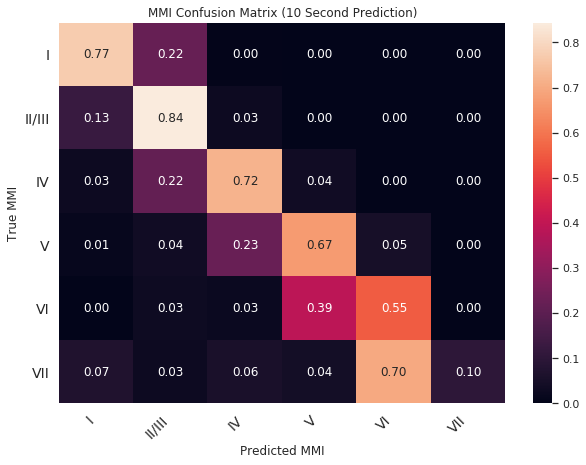

In [10]:
def print_confusion_matrix(confusion_matrix, class_names = None, figsize = (10,7), fontsize=14, labels=None, title=None):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    sns.set(font_scale=1)
    if class_names == None:
        class_names = list(np.arange(len(confusion_matrix)))
        
    print(class_names)
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')
    
    if labels:
        heatmap.yaxis.set_ticklabels(labels, rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(labels, rotation=45, ha='right', fontsize=fontsize)
    else:
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True MMI')
    plt.xlabel('Predicted MMI')
    if title != None:
        plt.title(title)
    return fig
from sklearn import metrics
cmat = metrics.confusion_matrix(y_true, y_pred)
cmat = cmat / np.expand_dims(np.sum(cmat, axis = 1), 1)
print_confusion_matrix(cmat, labels=["I", "II/III", "IV", "V", "VI", "VII", "VIII", "IX", "X+"], title="MMI Confusion Matrix (10 Second Prediction)");

In [12]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     75880
           1       0.83      0.84      0.84    137235
           2       0.80      0.72      0.76     29995
           3       0.71      0.67      0.69      5740
           4       0.56      0.55      0.56       840
           5       1.00      0.10      0.18        70

    accuracy                           0.80    249760
   macro avg       0.78      0.61      0.63    249760
weighted avg       0.80      0.80      0.80    249760



In [3]:
X = np.load("../data/hist15_norm_acc/X_train.npy")
X_unnorm = np.load("../data/hist15_norm_acc/X_val_original.npy")

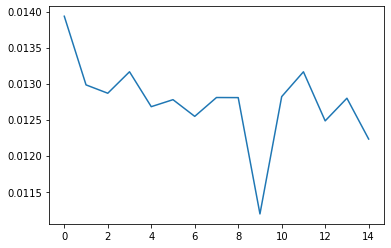

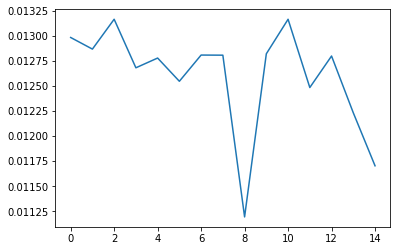

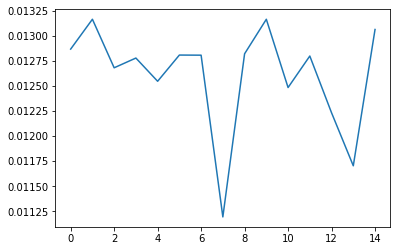

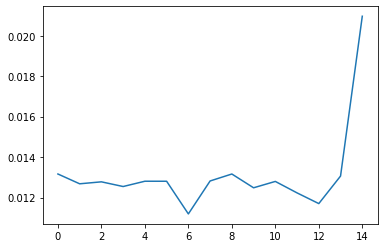

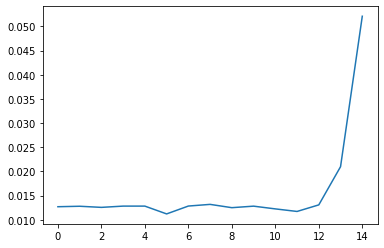

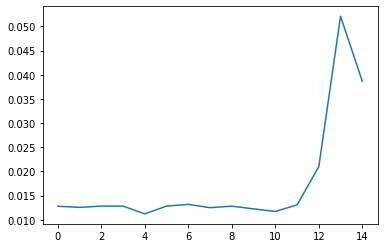

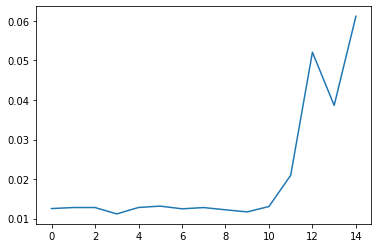

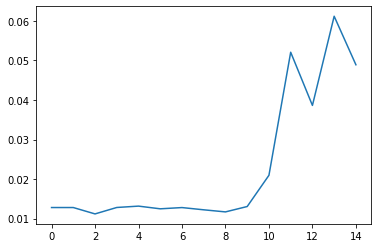

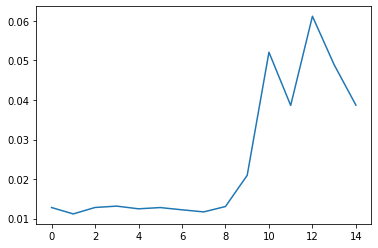

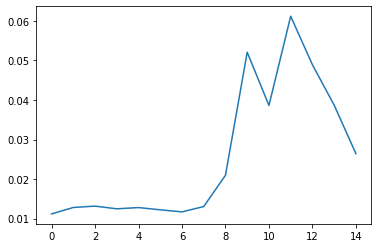

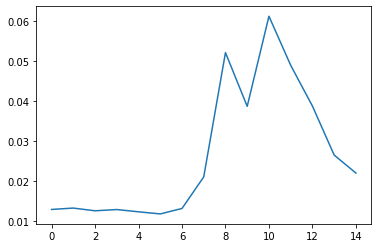

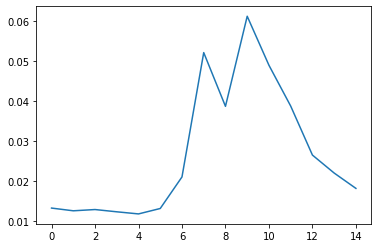

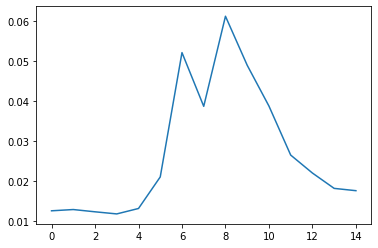

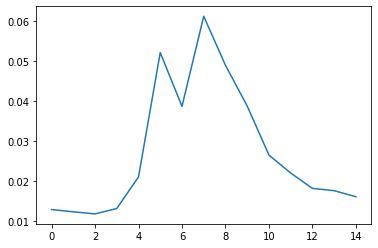

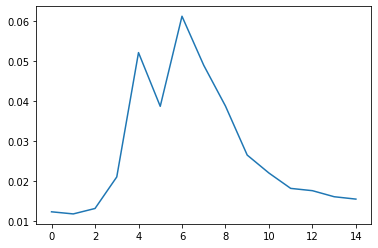

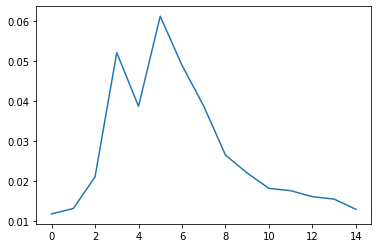

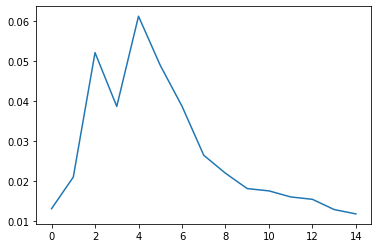

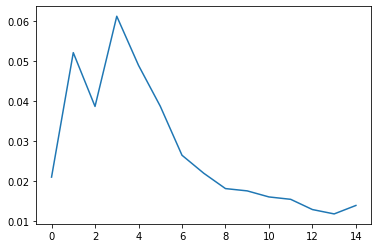

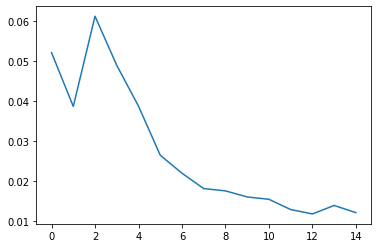

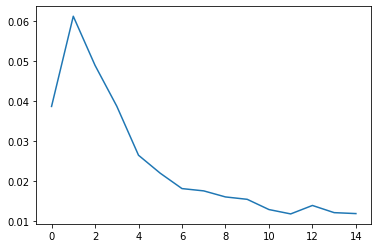

In [5]:
for i in range(0, 20):
    plt.figure()
    plt.plot(X_unnorm[i, :, 0])

In [3]:
np.max(X_unnorm)

429.10514054331964

(array([6.05500000e+03, 4.58414000e+05, 7.02492000e+06, 7.74600530e+07,
        1.56439907e+08, 7.23075250e+07, 4.30269650e+07, 2.32239780e+07,
        1.14213970e+07, 3.36516100e+06]),
 array([-9.65311350e-01, -7.72171037e-01, -5.79030723e-01, -3.85890410e-01,
        -1.92750097e-01,  3.90216595e-04,  1.93530530e-01,  3.86670843e-01,
         5.79811156e-01,  7.72951470e-01,  9.66091783e-01]),
 <a list of 10 Patch objects>)

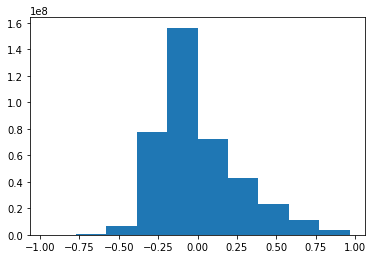

In [5]:
plt.hist(X.flatten())

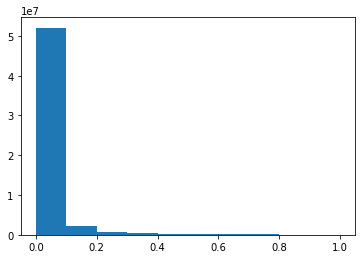

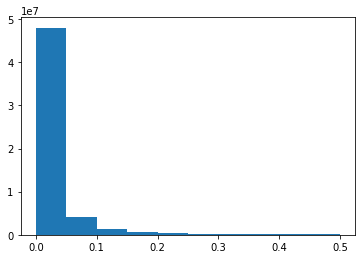

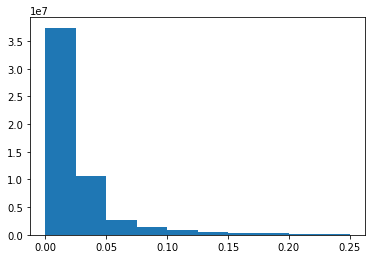

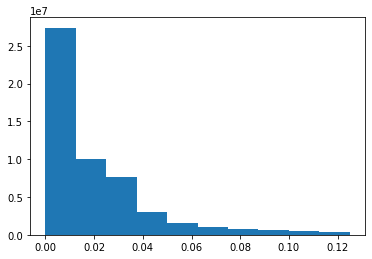

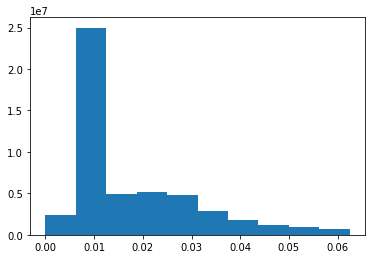

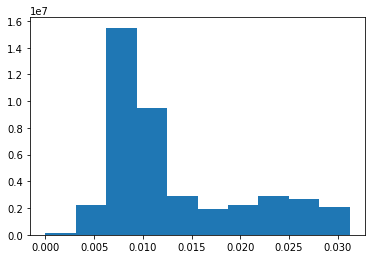

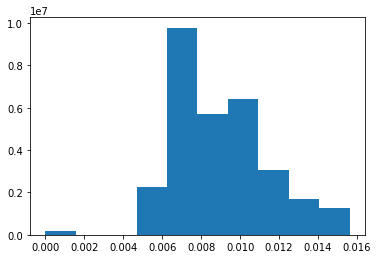

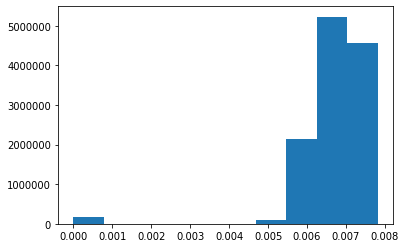

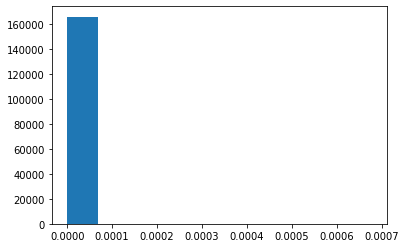

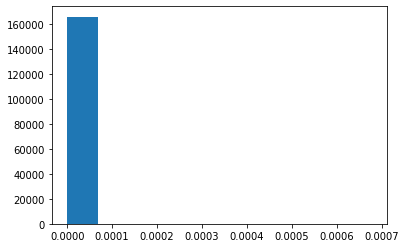

In [5]:
for i in range(10):
    thresh = 1/(2**i)
    plt.figure()
    plt.hist(X_unnorm.flatten()[X_unnorm.flatten() < thresh])

In [7]:
data = np.load('../data/acc/compressed/full_data.npy')

In [8]:
data.shape

(35679, 15, 60)

In [11]:
np.max(data.flatten())

2.6316105561952106

In [12]:
#Normalize the val set
eps = 1e-7
mean = np.mean(data, axis = 1, keepdims=True)
var = np.linalg.norm(data - mean, axis=1, keepdims=True)
var[var < eps] = 1
mean.shape, var.shape

((35679, 1, 60), (35679, 1, 60))

In [13]:
data_norm = (data - mean)/var

(array([1.1980000e+03, 2.1850600e+05, 5.5341120e+06, 1.6489809e+07,
        4.0639220e+06, 2.1564990e+06, 1.3703810e+06, 8.2592600e+05,
        5.5546000e+05, 8.9528700e+05]),
 array([-0.65825855, -0.49582352, -0.33338849, -0.17095346, -0.00851843,
         0.1539166 ,  0.31635163,  0.47878666,  0.64122169,  0.80365673,
         0.96609176]),
 <a list of 10 Patch objects>)

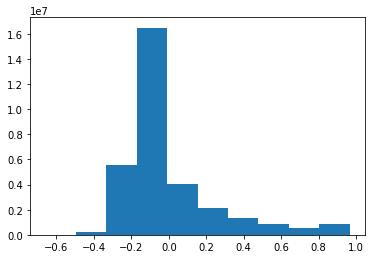

In [15]:
plt.hist(data_norm.flatten())

## New model multiclass

In [1]:
from tensorflow.keras.backend import categorical_crossentropy
def get_multipred_crossentropy_loss_fn(predictions = 15, classes = 6):
    '''
    Returns a loss which expects a predictions * classes vector, reshapes, and sums up the individual categorical crossentropies
    '''
    def loss(y_true, y_pred):
        total_loss = 0
        for i in range(0, classes*predictions, classes):
            total_loss += categorical_crossentropy(y_true[i:i + classes], y_pred[i : i+classes])
            
        return total_loss
    
    return loss

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/danjwu/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/danjwu/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 319, in wrapped
    return f(*args, **kwargs)
  File "/home/danjwu/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 353, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/home/danjwu/anaconda3/lib/python3.7/inspect.py", line 1502, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, context)
  File "/home/danjwu/anaconda3/lib/python3.7/inspect.py", line 1460, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/home/danjwu/anaconda3/lib/python3.7/inspect.py", line 696, in getsourcefile
    if getattr(getmodule(object, filename), '__loader__', None) is not 

KeyboardInterrupt: 

In [ ]:
fn = get_multipred_crossentropy_loss_fn()

In [ ]:
import numpy as np
from keras.backend import variable

y_true = np.zeros((15, 10))
y_true[:, 0] = 1
y_pred = variable(y_true.flatten())
y_true = variable(y_true.flatten())

fn(y_pred, y_true)

In [ ]:
import numpy as np
from keras.backend import variable

y_true = np.zeros((15, 10))
y_pred = y_true.copy()
y_true[:, 0] = 1
y_pred[:, 1] = 1
print(y_pred, y_true)
y_pred = variable(y_pred.flatten())
y_true = variable(y_true.flatten())

fn(y_pred, y_true)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128,
                            return_sequences=True,
                            input_shape=x_val.shape[-2:]))
model.add(tf.keras.layers.LSTM(64, return_sequences=True, activation='relu'))
model.add(tf.keras.layers.LSTM(64, activation='relu'))
model.add(tf.keras.layers.Dense(150))

model.load_weights(model_path)

model.compile(optimizer='nadam', loss=get_multipred_crossentropy_loss_fn(), metrics=['mae', 'mse'])
model.summary()

In [24]:
import tensorflow as tf

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.enable_eager_execution()

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#import seaborn as sns
import sklearn
from sklearn import metrics

tf.random.set_seed(13)

import py3nvml
py3nvml.grab_gpus(1)

AttributeError: module 'numpy' has no attribute '__config__'

In [9]:
import numpy as np

In [10]:
x_val = np.load("../data/class_mmi/X_val_unnorm.npy")
y_val = np.load("../data/class_mmi/y_val.npy")
x_val.shape, y_val.shape

((499520, 15, 15), (499520, 15))

In [11]:
from tensorflow.keras.utils import to_categorical

oh_y = to_categorical(y_val.flatten())

ModuleNotFoundError: No module named 'tensorflow.keras.utils'; 'tensorflow.keras' is not a package

In [ ]:
oh_y = oh_y.reshape(499520, -1)

In [8]:
oh_y.shape

(499520, 90)

In [9]:
oh_y[6732]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.], dtype=float32)

In [10]:
from sklearn.preprocessing import OneHotEncoder
# # creating one hot encoder object 
onehotencoder = OneHotEncoder()

y_val_OH = onehotencoder.fit_transform(y_val.reshape((-1, 1))).\
reshape((-1, 6*15)).toarray()

In [11]:
y_val_OH[6732]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

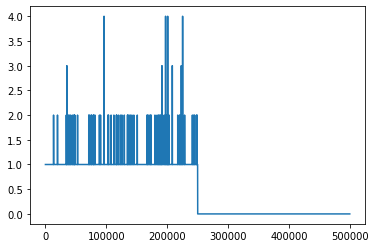

In [12]:
plt.plot(y_val[:, 0])

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128,
                            return_sequences=True,
                            input_shape=x_val.shape[-2:]))
model.add(tf.keras.layers.LSTM(64, return_sequences=True, activation='relu'))
model.add(tf.keras.layers.LSTM(64, activation='relu'))
model.add(tf.keras.layers.Dense(90, activation = 'softmax'))

model.load_weights("trained_models_acc/mmi_classification/classifier_v2.h5")

model.compile(optimizer='nadam', loss=get_multipred_crossentropy_loss_fn())
model.summary()

NameError: name 'tf' is not defined

In [14]:
y_pred = model.predict(x_val, batch_size = 4096)
y_pred.shape

(499520, 90)

In [15]:
y_pred[0]

array([2.15944974e-03, 8.50002766e-02, 7.34568530e-05, 7.36792629e-07,
       5.86039619e-07, 2.41280365e-08, 3.17434501e-03, 1.22497544e-01,
       2.54110309e-05, 3.40411901e-07, 3.02410474e-09, 3.47542475e-08,
       2.52530735e-04, 9.98982228e-03, 2.25143449e-05, 1.80046140e-06,
       4.88315122e-09, 2.51497951e-08, 2.82921502e-03, 1.09800220e-01,
       3.10832183e-05, 2.16878121e-07, 1.25009137e-06, 7.70108333e-09,
       7.28822313e-04, 3.12749594e-02, 2.83883655e-05, 3.72983482e-06,
       6.75481449e-09, 3.99735800e-09, 3.81751219e-03, 1.37016907e-01,
       1.63373101e-04, 3.55533575e-06, 2.82275465e-07, 1.17324515e-08,
       2.63706548e-04, 7.69852567e-03, 4.54953636e-07, 2.36438069e-08,
       4.97819963e-09, 1.71376211e-08, 3.79747758e-03, 1.10758319e-01,
       1.23544683e-04, 1.24732389e-06, 2.36729264e-07, 1.11376188e-07,
       3.39103979e-03, 1.22854136e-01, 8.79215895e-06, 1.48792410e-07,
       3.59164645e-08, 4.28329265e-08, 6.88535627e-04, 3.05807851e-02,
      

(array([4501501.,       0.,       0.,       0.,       0., 2981894.,
              0.,       0.,       0.,    9405.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

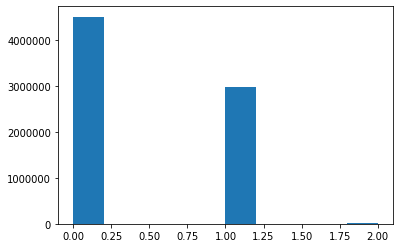

In [18]:
plt.hist(np.argmax(y_pred.reshape(-1, 6), axis = -1))

(array([3.7464e+06, 0.0000e+00, 3.7184e+06, 0.0000e+00, 2.5515e+04,
        0.0000e+00, 1.6450e+03, 0.0000e+00, 5.9500e+02, 2.4500e+02]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

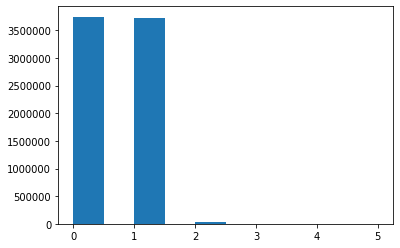

In [19]:
plt.hist(np.argmax(oh_y.reshape(-1, 6), axis = -1))

In [20]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([3746400, 3718400,   25515,    1645,     595,     245]))

In [23]:
print(sklearn.metrics.classification_report(y_val.flatten(), np.argmax(y_pred.reshape(-1, 6), axis = -1)))

/home/danjwu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.99      0.90   3746400
           1       0.98      0.79      0.87   3718400
           2       0.65      0.24      0.35     25515
           3       0.00      0.00      0.00      1645
           4       0.00      0.00      0.00       595
           5       0.00      0.00      0.00       245

    accuracy                           0.89   7492800
   macro avg       0.41      0.34      0.35   7492800
weighted avg       0.90      0.89      0.89   7492800



In [3]:
import keras.backend as K

def get_multipred_softmax_fn(predictions = 15, classes = 6):
    '''
    Expects a predictions * classes vector, reshapes to a 2d (predictions, classes), takes row-wise softmax, and flattens
    '''
    def multipred_softmax(x):
        output = K.softmax(K.reshape(x, (predictions, classes)), axis = -1)
        return K.flatten(output)
    
    return multipred_softmax

In [5]:
import numpy as np
from keras.backend import variable

x = np.zeros((15, 6))
x[:, 0] = 1
print(x)
x = variable(x.flatten())

fn = get_multipred_softmax_fn()
fn(x)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


<tf.Tensor: shape=(90,), dtype=float32, numpy=
array([0.35218745, 0.12956253, 0.12956253, 0.12956253, 0.12956253,
       0.12956253, 0.35218745, 0.12956253, 0.12956253, 0.12956253,
       0.12956253, 0.12956253, 0.35218745, 0.12956253, 0.12956253,
       0.12956253, 0.12956253, 0.12956253, 0.35218745, 0.12956253,
       0.12956253, 0.12956253, 0.12956253, 0.12956253, 0.35218745,
       0.12956253, 0.12956253, 0.12956253, 0.12956253, 0.12956253,
       0.35218745, 0.12956253, 0.12956253, 0.12956253, 0.12956253,
       0.12956253, 0.35218745, 0.12956253, 0.12956253, 0.12956253,
       0.12956253, 0.12956253, 0.35218745, 0.12956253, 0.12956253,
       0.12956253, 0.12956253, 0.12956253, 0.35218745, 0.12956253,
       0.12956253, 0.12956253, 0.12956253, 0.12956253, 0.35218745,
       0.12956253, 0.12956253, 0.12956253, 0.12956253, 0.12956253,
       0.35218745, 0.12956253, 0.12956253, 0.12956253, 0.12956253,
       0.12956253, 0.35218745, 0.12956253, 0.12956253, 0.12956253,
       0.129562

In [8]:
K.softmax(x[0:6])

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.35218745, 0.12956253, 0.12956253, 0.12956253, 0.12956253,
       0.12956253], dtype=float32)>

In [9]:
y_val

NameError: name 'y_val' is not defined